In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import sys

def get_n_dir_up(path, n):
    for _ in range(n):
        path = os.path.dirname(path)
    return path

CUR_PATH= os.path.abspath("__file__")
sys.path.append(os.path.join(get_n_dir_up(CUR_PATH, 2)))

In [6]:
from utils.eye_plotting import set_general_plt_styles

set_general_plt_styles()

## SD analysis

In [15]:
def plot_sd_bin_diagram(n_bins):
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 6.5))
    y_scale = 2
    y_min, y_max = -1-y_scale, 1+y_scale

    # baseline
    xs = np.deg2rad(np.arange(360))
    ys = np.sin(xs)
    ax.plot(xs, ys, color='#707070', linewidth=5)
    bin_borders = np.arange(n_bins+1) * (xs[-1]/n_bins)

    # mark border
    for b in bin_borders:
        ax.axvline(b, linestyle='--', color='#707070', alpha=0.3)

    np.random.seed(42)
    bin_size = 360 / n_bins
    plot_color = {
        1: '#444444',
        -1: '#999999',
    }
    for i in range(n_bins):
        id_min, id_max = int(i*bin_size), int((i+1)*bin_size) 
        x_range = xs[id_min:id_max]
        y_avg = np.mean(np.sin(x_range))
        for y_dir in [1, -1]:
            n_sample = 7
            x_samples = np.random.choice(
                x_range[10:-10], replace=False, size=n_sample)
            y_samples = np.sin(x_samples) + np.random.rand(n_sample) * y_dir * y_scale * 0.7
            y_samples = np.clip(y_samples, a_min=y_min, a_max=y_max)
            ax.scatter(
                x_samples, y_samples, 
                s=120, edgecolor='#707070', alpha=0.7,
                facecolor=plot_color[y_dir])
            ax.fill_between(
                x_range,
                y_avg * np.ones_like(x_range),
                y_max * y_dir * np.ones_like(x_range),
                color=plot_color[y_dir],
                alpha=0.2,
            )

    ax.axhline(0, color='dimgray')
    ax.set_ylim([y_min, y_max])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # annotation
    ax.set_yticks([-2, 0, 2])
    ax.set_yticklabels([-5, 0, 5], fontsize=16)
    ax.set_ylabel(r'Behaviour Bias', fontsize=20)

    ax.set_xticks([0, np.pi, np.pi*2])
    ax.set_xticklabels([0, 45, 90], fontsize=16)
    ax.set_xlabel(r'Last Resp - Current Stim', fontsize=20)

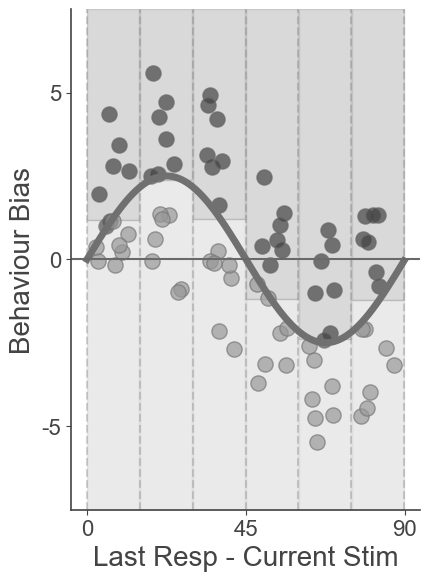

In [16]:
plot_sd_bin_diagram(6)

## RSA

In [7]:
s1 = np.array([0, 30, 60, 90])
s_diffs = np.subtract.outer(s1, s1)
s_diffs = np.abs(s_diffs)
s_diffs = np.min([s_diffs, 180 - s_diffs], axis=0)
s_sims = 1 - s_diffs / 90

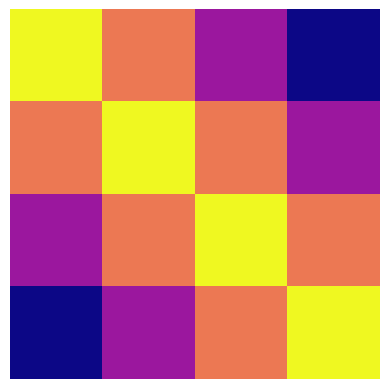

In [31]:
plt.imshow(s_sims, cmap='plasma', vmin=0, vmax=1)
_ = plt.axis('off')

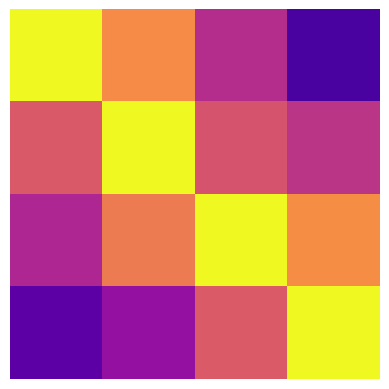

In [35]:
np.random.seed(42)
ns_sims_1 = np.random.rand(4, 4) * 0.2 + s_sims * 0.8
max_val = 1 # np.max(ns_sims_1)
np.fill_diagonal(ns_sims_1, max_val)

plt.imshow(ns_sims_1, cmap='plasma', vmin=0, vmax=1)
_ = plt.axis('off')

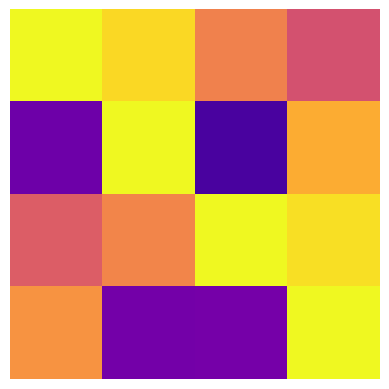

In [36]:
np.random.seed(42)
ns_sims_2 = np.random.rand(4, 4) * 0.9 + s_sims * 0.1
max_val = 1 # np.max(ns_sims_2)
np.fill_diagonal(ns_sims_2, max_val)

plt.imshow(ns_sims_2, cmap='plasma', vmin=0, vmax=1)
_ = plt.axis('off')

## Weights

In [2]:
degs = np.arange(360) - 179.5
rads = np.deg2rad(degs)

### accuracy

In [3]:
acc_w = np.cos(rads)

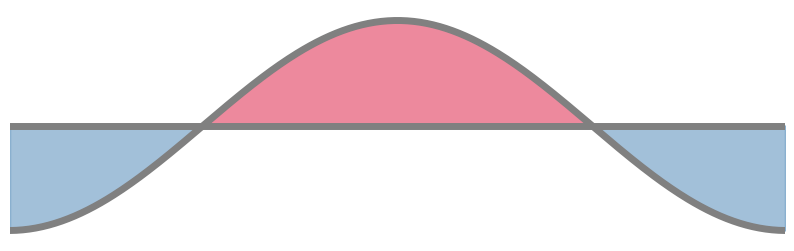

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 3))
ax.plot(rads, acc_w, color='gray', linewidth=5)
ax.axhline(0, color='gray', linewidth=5)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

pos_mask = acc_w > 0
ax.fill_between(
    rads[pos_mask], acc_w[pos_mask], 0,
    color='crimson', alpha=0.5)
neg_mask_left = (acc_w < 0) & (rads < 0)
ax.fill_between(
    rads[neg_mask_left], acc_w[neg_mask_left], 0,
    color='steelblue', alpha=0.5)
neg_mask_right = (acc_w < 0) & (rads > 0)
ax.fill_between(
    rads[neg_mask_right], acc_w[neg_mask_right], 0,
    color='steelblue', alpha=0.5)

ax.set_xlim([rads[0], rads[-1]])
_ = ax.axis('off')

### bias

In [7]:
bias_w = ((np.cos(rads) + 1) / 2) * np.cos(rads)
bias_w[rads<0] = -bias_w[rads<0]
bias_w[rads==0] = 0

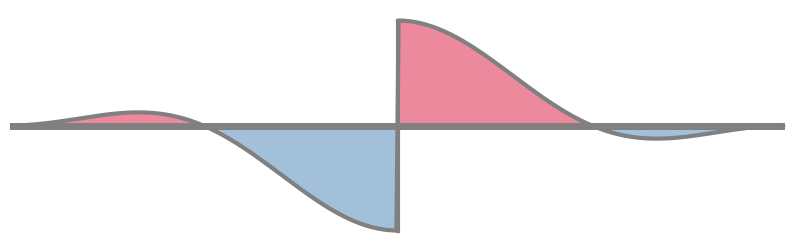

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 3))

ax.axhline(0, color='gray', linewidth=5)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(rads, bias_w, color='gray', linewidth=3)
ax.plot([0, 0], [-1, 1], color='gray', linewidth=3)

err_thresh=60
left_mask = rads < 0
right_mask = rads > 0
pos_mask = bias_w > 0
neg_mask = bias_w < 0

for x_mask in [left_mask, right_mask]:
    for i, y_mask in enumerate([pos_mask, neg_mask]):
        mask = x_mask & y_mask
        color = ['crimson', 'steelblue'][i]
        ax.fill_between(
            rads[mask], bias_w[mask], 0,
            color=color, alpha=0.5)

ax.set_xlim([rads[0], rads[-1]])
_ = ax.axis('off')

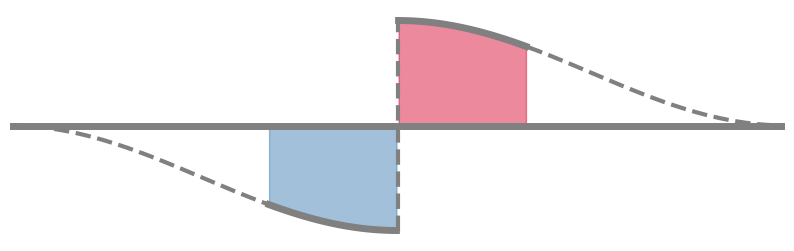

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 3))
ax.axhline(0, color='gray', linewidth=5)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

left_mask = rads < 0
right_mask = rads > 0

ax.plot(rads[left_mask], bias_w[left_mask], color='gray', linestyle='--', linewidth=3)
ax.plot(rads[right_mask], bias_w[right_mask], color='gray', linestyle='--', linewidth=3)

ax.plot([0, 0], [-1, 1], color='gray', linestyle='--', linewidth=3)

err_thresh=60
pos_mask = right_mask & (np.abs(degs) <= err_thresh)
neg_mask = left_mask & (np.abs(degs) <= err_thresh)
ax.fill_between(
    rads[pos_mask], bias_w[pos_mask], 0,
    color='crimson', alpha=0.5)
ax.plot(
    rads[pos_mask], bias_w[pos_mask], color='gray', linewidth=5)
ax.fill_between(
    rads[neg_mask], bias_w[neg_mask], 0,
    color='steelblue', alpha=0.5)
ax.plot(
    rads[neg_mask], bias_w[neg_mask], color='gray', linewidth=5)

ax.set_xlim([rads[0], rads[-1]])
_ = ax.axis('off')

## Example Distribution

In [100]:
def plot_distrib(m, k, offset, fheight=3, ymax=4/360, linewidth=8, return_results=False, show_mid=True):
    m = np.deg2rad(m)
    fig, ax = plt.subplots(1, figsize=(5, fheight))
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    if show_mid:
        ax.plot([0, 0], [0, ymax], color='yellow', linewidth=5, linestyle='--')
    distrib = np.exp(k * np.cos(rads-m))
    distrib = distrib / np.sum(distrib)
    distrib = offset/360 + (1-offset)*distrib
    ax.plot(rads, distrib, color='gray', linewidth=linewidth)

    ax.axhline(0, color='gray', linewidth=5)
    ax.set_xlim([rads[0], rads[-1]])
    ax.set_ylim([-0.1/360, ymax])
    _ = ax.axis('off')

    if return_results:
        return ax, distrib

### different levels of accuracy

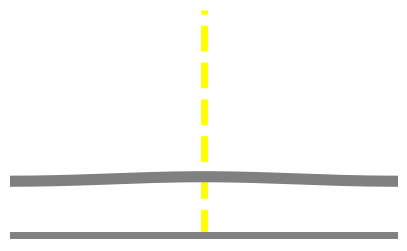

In [8]:
# bad
plot_distrib(0, 0.1, 0.6)

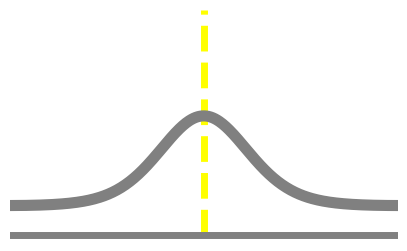

In [9]:
# good
plot_distrib(0, 2, 0.5)

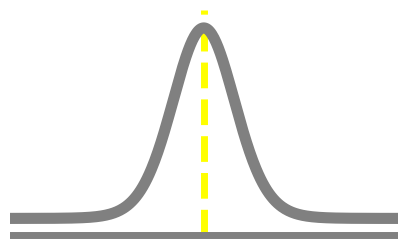

In [10]:
# execellent
plot_distrib(0, 4, 0.3)

### different bias

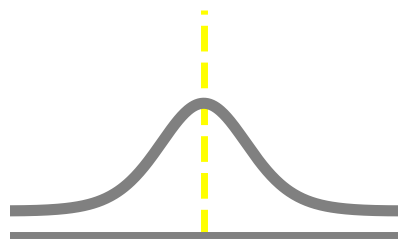

In [11]:
# no-bias
plot_distrib(0, 2, 0.4)

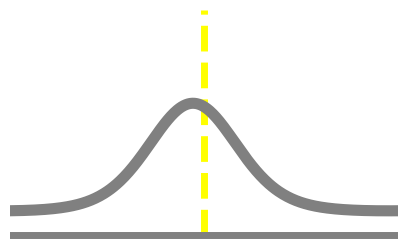

In [12]:
# neg-bias
plot_distrib(-10, 2, 0.4)

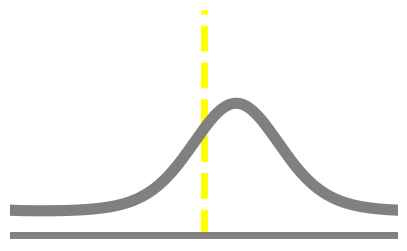

In [13]:
# pos-bias
plot_distrib(30, 2, 0.4)

## Plot Channel Tunings

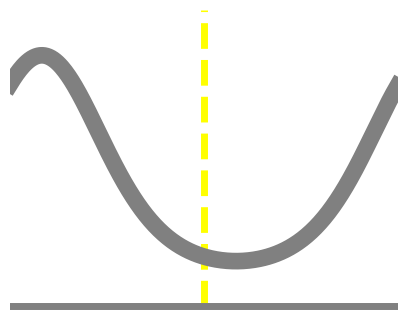

In [14]:
plot_distrib(-150, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

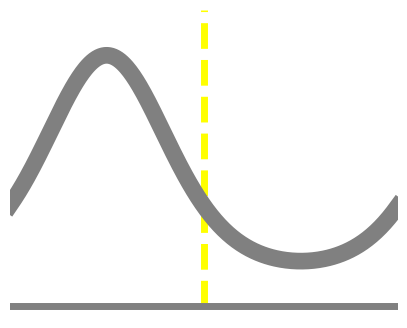

In [15]:
plot_distrib(-90, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

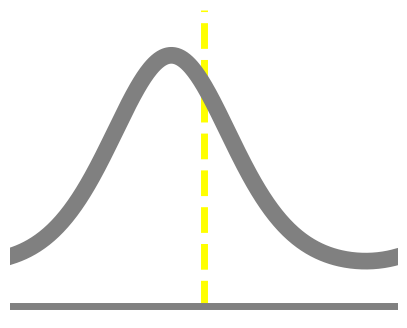

In [16]:
plot_distrib(-30, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

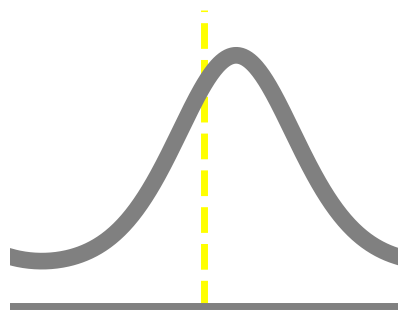

In [17]:
plot_distrib(30, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

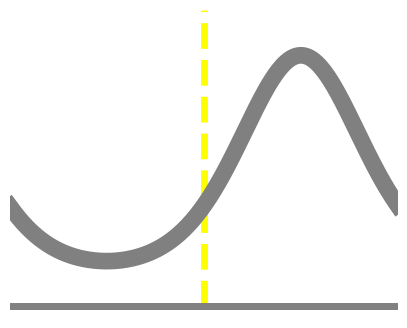

In [18]:
plot_distrib(90, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

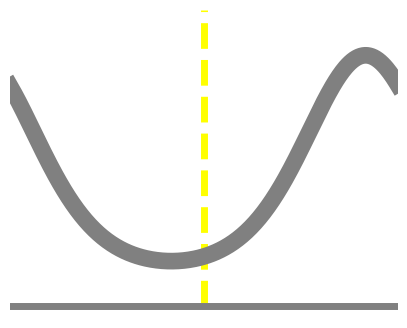

In [19]:
plot_distrib(150, 1, 0.1, fheight=4, ymax=2/300, linewidth=12)

### inverted encoding

In [20]:
example_xs = np.array([-150, -90,-30, 30, 90, 150])

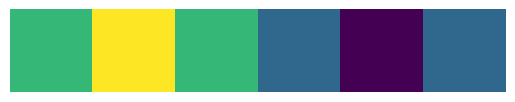

In [21]:
cweights = np.array([[1, 2, 1, 0, -1, 0]])
fig, ax = plt.subplots()
fig.patch.set_alpha(0)
ax.imshow(cweights)
_ = ax.axis('off')

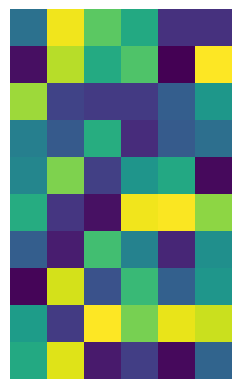

In [22]:
np.random.seed(42)
channel_activity = np.random.rand(10, 6)
fig, ax = plt.subplots()
fig.patch.set_alpha(0)
ax.imshow(channel_activity)
_ = ax.axis('off')

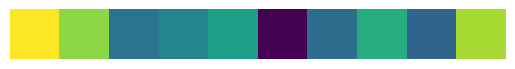

In [23]:
final_activity = channel_activity @ cweights.T
fig, ax = plt.subplots()
fig.patch.set_alpha(0)
ax.imshow(final_activity.T)
_ = ax.axis('off')

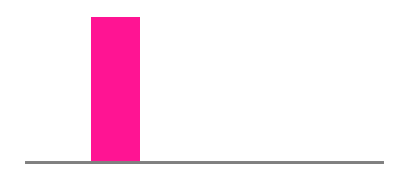

In [24]:
# mark stimuli
fig, ax = plt.subplots(1, figsize=(5, 2))
fig.patch.set_alpha(0)
ax.plot([-180, 180], [0, 0], color='gray', linewidth=5)
ax.bar([-90,], [1,], width=50, color='deeppink')
# ax.plot([-90, -90], [0.02, 1], color='deeppink', linewidth=10)
_ = ax.axis('off')

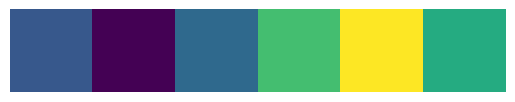

In [25]:
np.random.seed(42)
new_zs = np.array([[0, -1, 0, 1, 2, 1]])+2
noise = np.random.rand(*(new_zs.shape)) * 0.5
new_ys = new_zs + noise
fig, ax = plt.subplots()
fig.patch.set_alpha(0)
ax.imshow(new_ys)
_ = ax.axis('off')

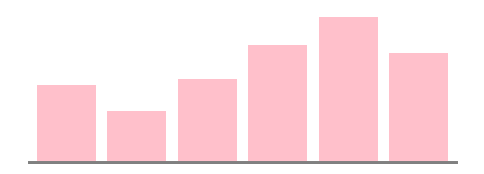

In [26]:
fig, ax = plt.subplots(1, figsize=(6, 2))
fig.patch.set_alpha(0)
ax.bar(example_xs, new_ys[0], width=50, color='pink')
ax.plot([-180, 180], [0, 0], color='gray', linewidth=5)
_ = ax.axis('off')

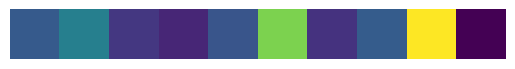

In [27]:
noisy_activity = channel_activity @ new_ys.T
fig, ax = plt.subplots()
fig.patch.set_alpha(0)
ax.imshow(noisy_activity.T)
_ = ax.axis('off')

## Explain prediction

In [74]:
example_xs = [40, 260, 140]
example_ys = [70, 220, 120]
example_ks = [2, 1, 3]
example_offset = [0.4, 0.6, 0.3]
n_examples = 3

In [101]:
def plot_example_resp_pred(i, aligned):
    ymax = 4/360
    if aligned:
        x, y = example_xs[i] - example_ys[i], 180
    else:
        x, y = example_xs[i]-180, example_ys[i]
    ax, distrib = plot_distrib(
        x, k=example_ks[i], 
        offset=example_offset[i], fheight=3, 
        ymax=ymax, linewidth=8, 
        return_results=True, show_mid=False)
    y_gt = rads[y]
    ax.plot([y_gt, y_gt], [0, ymax], linestyle='--', color='gold', linewidth=5)

    return distrib

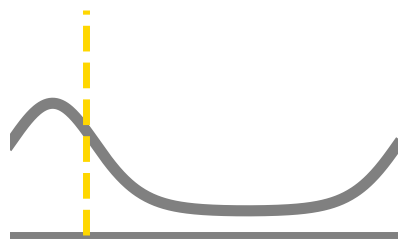

In [102]:
_ = plot_example_resp_pred(0, False)

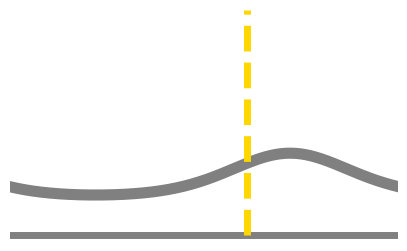

In [103]:
_ = plot_example_resp_pred(1, False)

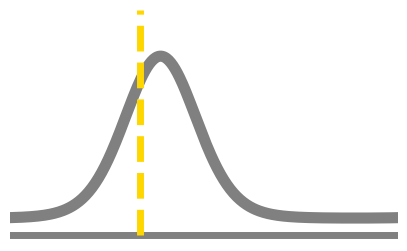

In [104]:
_ = plot_example_resp_pred(2, False)

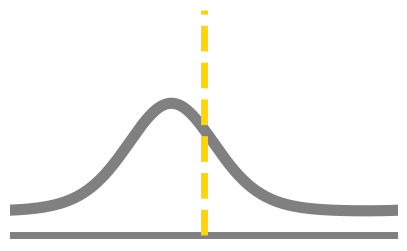

In [105]:
aligned_0 = plot_example_resp_pred(0, True)

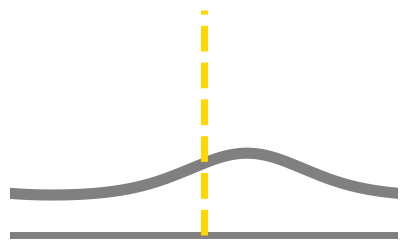

In [106]:
aligned_1 = plot_example_resp_pred(1, True)

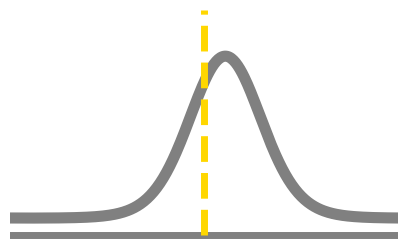

In [107]:
aligned_2 = plot_example_resp_pred(2, True)

In [108]:
aggregated = np.mean([
    aligned_0, aligned_1, aligned_2
], axis=0)

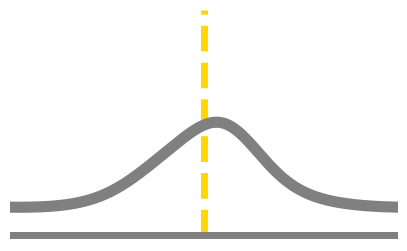

In [111]:
fig, ax = plt.subplots(1, figsize=(5, 3))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.plot([0, 0], [0, ymax], color='gold', linewidth=5, linestyle='--')
ax.plot(rads, aggregated, color='gray', linewidth=8)

ax.axhline(0, color='gray', linewidth=5)
ax.set_xlim([rads[0], rads[-1]])
ax.set_ylim([-0.1/360, ymax])
_ = ax.axis('off')